## Localización de escuelas en comunas de Coquimbo y La Serena en Chile usando Folium.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###  1. Carga de datos.

Se trabajará con la base de datos de establecimientos educacionales a nivel nacional,disponible en el sitio del Ministerio de Educación, en http://datos.mineduc.cl/dashboards/20015/descarga-bases-de-datos-directorio-de-establecimientos-educacionales/ 

Según lo señalado en el esquema de la base de datos (también disponible en el sitio señalado), las escuelas activas son aquellas con ESTADO_ESTAB=1 y MATRICULA=1, por lo que se realizará un filtro para selecionar aquellas escuelas que cumplen con estos criterios.

In [2]:
escuelas_chile= pd.read_csv("Directorio_Oficial_EE_2019.csv", sep=';', encoding='UTF-8')

In [3]:
escuelas_chile.shape

(16236, 37)

In [4]:
escuelas_activas = escuelas_chile[(escuelas_chile['ESTADO_ESTAB']==1) & (escuelas_chile['MATRICULA']==1)].reset_index(drop=True)

In [5]:
escuelas_activas.shape

(11451, 37)

In [6]:
escuelas_activas.head()

,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,...,ENS_08,ENS_09,ENS_10,ENS_11,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL
0,2019,1,9,LICEO POLITECNICO ARICA,,69010100,1,15,AYP,151,...,0,0,0,0,1,1,2,,GRATUITO,GRATUITO
1,2019,2,7,PARVULARIO LAS ESPIGUITAS,,69010100,1,15,AYP,151,...,0,0,0,0,1,1,2,,GRATUITO,GRATUITO
2,2019,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,69010100,1,15,AYP,151,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
3,2019,4,3,LICEO OCTAVIO PALMA PEREZ,,69010100,1,15,AYP,151,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
4,2019,5,1,JOVINA NARANJO FERNANDEZ,,69010100,1,15,AYP,151,...,0,0,0,0,1,1,7,PLURALISTA,GRATUITO,GRATUITO


In [7]:
escuelas_activas.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'MRUN', 'RUT_SOSTENEDOR',
       'P_JURIDICA', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_PRO_RBD',
       'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD',
       'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'LATITUD', 'LONGITUD',
       'CONVENIO_PIE', 'ENS_01', 'ENS_02', 'ENS_03', 'ENS_04', 'ENS_05',
       'ENS_06', 'ENS_07', 'ENS_08', 'ENS_09', 'ENS_10', 'ENS_11', 'MATRICULA',
       'ESTADO_ESTAB', 'ORI_RELIGIOSA', 'ORI_OTRO_GLOSA', 'PAGO_MATRICULA',
       'PAGO_MENSUAL'],
      dtype='object')

In [8]:
# Eliminación de columnas que no se utilizarán.
escuelas_activas=escuelas_activas.drop(columns=['AGNO', 'RBD', 'DGV_RBD', 'MRUN', 'RUT_SOSTENEDOR','P_JURIDICA',
                                                'NOM_REG_RBD_A', 'COD_PRO_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD',
                                                'COD_DEPE', 'CONVENIO_PIE', 'ENS_01', 'ENS_02', 'ENS_03', 'ENS_04',
                                                'ENS_05', 'ENS_06', 'ENS_07', 'ENS_08', 'ENS_09', 'ENS_10', 'ENS_11',
                                                'MATRICULA','ESTADO_ESTAB', 'ORI_RELIGIOSA', 'ORI_OTRO_GLOSA',
                                                'PAGO_MATRICULA','PAGO_MENSUAL'])

In [9]:
escuelas_activas.columns

Index(['NOM_RBD', 'COD_REG_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPE2',
       'RURAL_RBD', 'LATITUD', 'LONGITUD'],
      dtype='object')

In [10]:
# Renombrar regiones.
escuelas_activas['COD_REG_RBD']=escuelas_activas['COD_REG_RBD'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
                           ['TARAPACA','ANTOFAGASTA','ATACAMA','COQUIMBO','VALPARAISO','OHIGGINS','MAULE','BIO-BIO','ARAUCANIA',
                            'LOS LAGOS','AYSEN','MAGALLANES','METROPOLITANA','LOS RIOS','ARICA/PARINACOTA','ÑUBLE'])

In [11]:
# Renombrar dependencia de la escuela.
escuelas_activas['COD_DEPE2']=escuelas_activas['COD_DEPE2'].replace( [1,2,3,4,5],
                                                                    ['MUNICIPAL','PARTICULAR SUBVENCIONADO','PARTICULAR PAGADO',
                                                                     'CORP. ADMINISTRACION DELEGADA','SERVICIO LOCAL EDUCACION'])

In [12]:
# Renombrar columnas.
escuelas_activas.rename(columns={'NOM_RBD': 'Nombre_Escuela','COD_REG_RBD':'Region', 'COD_COM_RBD' :'Cod_Comuna',
                                 'NOM_COM_RBD': 'Comuna', 'COD_DEPE2' :'Dependencia', 'RURAL_RBD':'Rural',
                                 'LATITUD':'Latitud', 'LONGITUD' :'Longitud'}, inplace=True)

In [13]:
escuelas_activas.head()

,Nombre_Escuela,Region,Cod_Comuna,Comuna,Dependencia,Rural,Latitud,Longitud
0,LICEO POLITECNICO ARICA,ARICA/PARINACOTA,15101,ARICA,MUNICIPAL,0,"-18,487274170000","-70,294738770000"
1,PARVULARIO LAS ESPIGUITAS,ARICA/PARINACOTA,15101,ARICA,MUNICIPAL,0,"-18,469861980000","-70,302757260000"
2,ESC. PEDRO VICENTE GUTIERREZ TORRES,ARICA/PARINACOTA,15101,ARICA,MUNICIPAL,1,"-18,503580090000","-70,260826110000"
3,LICEO OCTAVIO PALMA PEREZ,ARICA/PARINACOTA,15101,ARICA,MUNICIPAL,0,"-18,474243160000","-70,308265690000"
4,JOVINA NARANJO FERNANDEZ,ARICA/PARINACOTA,15101,ARICA,MUNICIPAL,0,"-18,476903920000","-70,313453670000"


In [14]:
# Conversión de columnas de Latitud y Longitud a formato númerico. 
escuelas_activas['Latitud'] = escuelas_activas['Latitud'].str.replace(",", ".")
escuelas_activas['Longitud'] = escuelas_activas['Longitud'].str.replace(",", ".")
escuelas_activas['Latitud'] = pd.to_numeric(escuelas_activas['Latitud'], errors='coerce')
escuelas_activas['Longitud'] = pd.to_numeric(escuelas_activas['Longitud'], errors='coerce')

In [15]:
escuelas_activas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11451 entries, 0 to 11450
Data columns (total 8 columns):
Nombre_Escuela    11451 non-null object
Region            11451 non-null object
Cod_Comuna        11451 non-null int64
Comuna            11451 non-null object
Dependencia       11451 non-null object
Rural             11451 non-null int64
Latitud           11435 non-null float64
Longitud          11435 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 715.8+ KB


In [16]:
# Identificar columnas con datos faltantes.
escuelas_activas.isna().sum()

Nombre_Escuela     0
Region             0
Cod_Comuna         0
Comuna             0
Dependencia        0
Rural              0
Latitud           16
Longitud          16
dtype: int64

In [17]:
# Eliminación de observaciones con datos faltantes.
escuelas_activas=escuelas_activas.dropna().reset_index(drop=True)

###  2. Visualización de datos.

#### 2.1 Cantidad de escuelas por región.

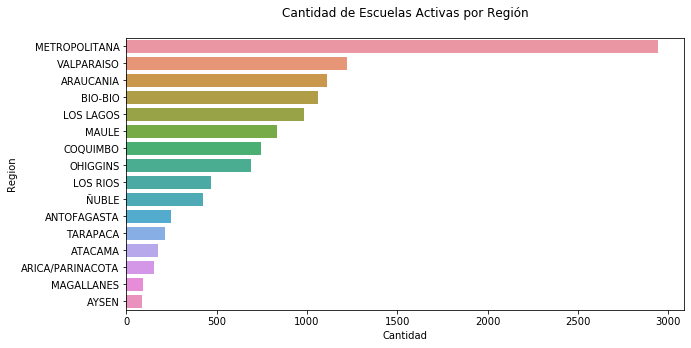

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(y=escuelas_activas['Region'],data=escuelas_activas, order=escuelas_activas['Region'].value_counts().index)
plt.xlabel('Cantidad')
plt.title("Cantidad de Escuelas Activas por Región\n");

#### 2.2 Cantidad de escuelas por tipo de dependencia.

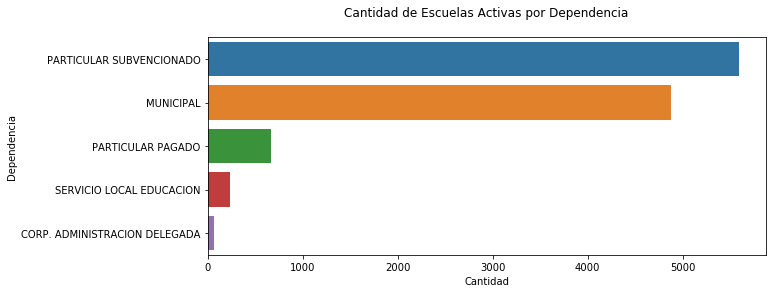

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(y=escuelas_activas['Dependencia'],data=escuelas_activas, order=escuelas_activas['Dependencia'].value_counts().index)
plt.xlabel('Cantidad')
plt.title("Cantidad de Escuelas Activas por Dependencia\n");

### 3. Mapas con escuelas en comunas de Coquimbo y La Serena usando Folium.

In [20]:
# Selección de datos correspondientes a la comuna de Coquimbo y La Serena.
data_mapas=escuelas_activas[(escuelas_activas['Comuna']=='COQUIMBO') | (escuelas_activas['Comuna']=='LA SERENA') ]

In [21]:
import folium
from folium import Marker, Circle, Choropleth 
from folium.plugins import HeatMap

#### 3.1 Elaboración de Heatmap.

Con Heatmap (Mapa de Calor) es posible visualizar las zonas en que se concentran mayor o menor cantidad de escuelas en el territorio.

In [22]:
# Crer mapa base
m_1 = folium.Map(location=[-29.9327, -71.252], tiles='cartodbpositron', zoom_start=12)

# Agregar heatmap al mapa base
HeatMap(data=data_mapas[['Latitud', 'Longitud']], radius=10).add_to(m_1)

# Grabar mapa
# m_1.save('rg_coquimbo_1.html')

# Ver mapa
m_1

#### 3.2 Elaboración de Bubble Map.

Con Bubble Map(Mapa de Burbuja) es posible identificar los distintos tipos de establecimientos segun su dependencia (u otra variable), utilizando diferentes colores de las burbujas.

En este caso se ha definido los siguientes colores, según la dependencia:

- Municipal: Azul.
- Particular Subvencionado: Rojo.
- Particular Pagado: Amarillo.
- Servicio Local de Educación: Negro.
- Corp. Administracion Delegada: Verde.

In [23]:
# Crer mapa base
m_2 = folium.Map(location=[-29.9327, -71.252], zoom_start=12)


# Función de identificación de escuelas, por colores, según dependencia.
def color_producer(val):
    if val == 'MUNICIPAL':
        return 'blue'
    elif val == 'PARTICULAR SUBVENCIONADO':
        return 'red'
    elif val == 'PARTICULAR PAGADO':
        return 'yellow'
    elif val == 'SERVICIO LOCAL EDUCACION':
        return 'black'    
    else:
        return 'green'

# Agregar mapa de burbuja al mapa base
for idx, row in data_mapas.iterrows():
    Circle(
        location=[row['Latitud'], row['Longitud']],
        radius=50,
        color=color_producer(row['Dependencia'])).add_to(m_2)

# Grabar mapa
# m_2.save('rg_coquimbo_2.html')

# Ver mapa
m_2

#### 3.3 Incorporación de Marker con Popup.

Con un Marker (Marcador) ers posible localizar las escuelas en el mapa y al agregar una popup (ventana emergente) se entrega información específica de cada escuela, la que se despliega al pinchar el Marker respectivo. En este caso se ha agregado el nombre de cada escuela en el popup.

Se han confeccionado dos mapas, el primero con los datos de las escuelas dependientes de un Servicio Local de Educación y el segundo con establecimientos particular pagados.

#### 3.3.1 Mapa con escuelas dependientes de Servivio Local de Educación.

In [24]:
# Seleccion de datos asociados a Servicio Local de Educación 
data_servicio_local=data_mapas[data_mapas['Dependencia'] == 'SERVICIO LOCAL EDUCACION']

In [25]:
# Crer mapa base
m_3 = folium.Map(location=[-29.9627, -71.252], zoom_start=12)

# Agregar Marker con popup al mapa base
for idx, row in data_servicio_local.iterrows():
    localiza=[row['Latitud'], row['Longitud']]
    Marker(location=localiza, popup=row['Nombre_Escuela']).add_to(m_3)
        
# Grabar mapa
# m_3.save('rg_coquimbo_3.html')

# Ver mapa
m_3

#### 3.3.2 Mapa con establecimientos particular pagados.

In [26]:
# Seleccion de datos establecimientos particular pagados 
data_particular_pagado=data_mapas[data_mapas['Dependencia'] == 'PARTICULAR PAGADO']

In [27]:
# Crer mapa base
m_4 = folium.Map(location=[-29.9527, -71.252], zoom_start=12)

# Agregar Marker con popup al mapa base
for idx, row in data_particular_pagado.iterrows():
    localiza=[row['Latitud'], row['Longitud']]
    Marker(location=localiza, popup=row['Nombre_Escuela']).add_to(m_4)
        
# Grabar mapa
# m_4.save('rg_coquimbo_4.html')

# Ver mapa
m_4